In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds
import time
import matplotlib.pyplot as plt

# Load the dataset
ds_builder = tfds.builder("clic_edm_qq_pf", data_dir='../../tensorflow_datasets/')
dss = ds_builder.as_data_source("test")

# Warm up the GPU (optional, but can help in some cases)
for elem in dss:
    _ = tf.dtypes.cast(elem["X"], tf.float16)
    break

# Lists to store original and quantized outputs
original_outputs = []
quantized_outputs = []

# Process 10 samples and store outputs
for i, elem in enumerate(dss):
    original_output = elem["X"]
    quantized_output = tf.dtypes.cast(original_output, tf.float16)

    original_outputs.append(original_output)
    quantized_outputs.append(quantized_output)

    print(f"Sample {i+1}")
    print(f"Original Output: {original_output}")
    print(f"Quantized Output: {quantized_output}")

    if i >= 9:  # Process 10 samples
        break

# Measure inference time
total_time = 0
num_samples = 0



Sample 1
Original Output: [[ 1.00000000e+00  6.78915453e+00  4.15347427e-01 ... -6.50222972e-02
  -1.00000000e+00  0.00000000e+00]
 [ 1.00000000e+00  3.70598841e+00  2.90562421e-01 ...  1.71025082e-01
  -1.00000000e+00  0.00000000e+00]
 [ 1.00000000e+00  3.91010237e+00  8.51918697e-01 ... -3.85140185e-03
  -1.00000000e+00  0.00000000e+00]
 ...
 [ 2.00000000e+00  2.72556067e+00  2.37740397e+00 ...  1.51042757e+01
   9.23393726e+00  3.70637131e+01]
 [ 2.00000000e+00  2.04655075e+00  2.74336505e+00 ...  1.00135965e+01
   9.99645424e+00  4.25156593e+01]
 [ 2.00000000e+00  1.10548840e+01  2.12973428e+00 ...  1.36035995e+02
   1.01955055e+02  3.58329803e+02]]
Quantized Output: [[ 1.0000e+00  6.7891e+00  4.1528e-01 ... -6.5002e-02 -1.0000e+00
   0.0000e+00]
 [ 1.0000e+00  3.7051e+00  2.9053e-01 ...  1.7102e-01 -1.0000e+00
   0.0000e+00]
 [ 1.0000e+00  3.9102e+00  8.5205e-01 ... -3.8509e-03 -1.0000e+00
   0.0000e+00]
 ...
 [ 2.0000e+00  2.7246e+00  2.3770e+00 ...  1.5102e+01  9.2344e+00
   3.7

Average Inference Time: 0.0005575418472290039 seconds


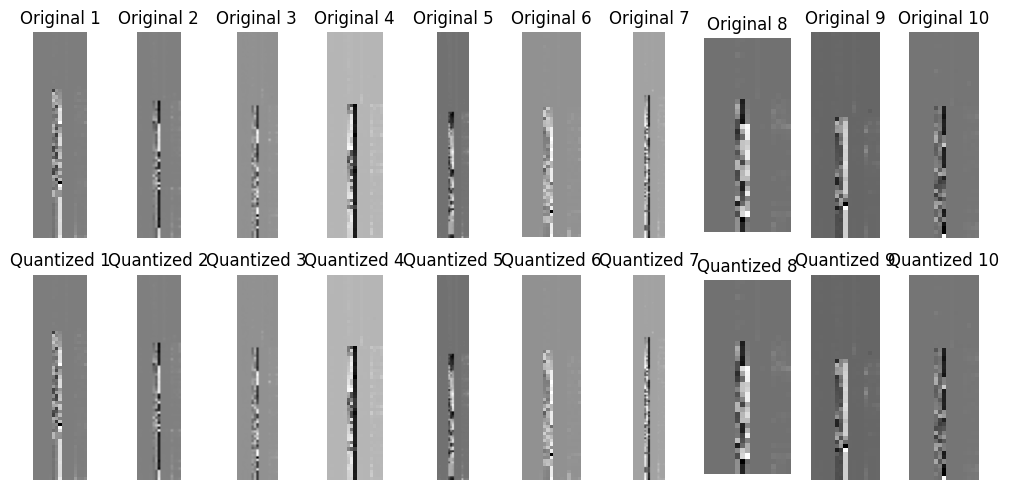

In [3]:

for elem in dss:
    start_time = time.time()
    quantized_weights = tf.dtypes.cast(elem["X"], tf.float16)
    end_time = time.time()
    total_time += end_time - start_time
    num_samples += 1

    if num_samples >= 10:  # Process 10 samples
        break

average_inference_time = total_time / num_samples
print(f'Average Inference Time: {average_inference_time} seconds')

# Plotting the outputs
plt.figure(figsize=(10, 5))

for i in range(10):
    plt.subplot(2, 10, i+1)
    plt.imshow(original_outputs[i], cmap='gray')
    plt.axis('off')
    plt.title(f'Original {i+1}')

    plt.subplot(2, 10, i+11)
    plt.imshow(quantized_outputs[i], cmap='gray')
    plt.axis('off')
    plt.title(f'Quantized {i+1}')

plt.tight_layout()
plt.show()

      

